In [1]:
!ls

001_repaso_python.ipynb     GE.csv
002_mls.ipynb               Prestige.csv
003_RLM_aplicacion.ipynb    README.md
004_multicolinealidad.ipynb all_perth_310121.csv
005_analisis_residuos.ipynb exm_dep_par_1.ipynb
Advertising.csv             pop.csv


In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('./Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


$X_1=\text{TV}$, $X_2=\text{radio}$, $X_3=\text{newspaper}$, son variables independientes.

$Y =\text{sales}$, es variable dependiente.

$X^{\left(i\right)}$ es el $i$-ésimo registro del dataset.

Ejemplo: 

$X^{\left(0\right)} = \left(230.1, 37.8, 69.2\right)$ y $y_0 = 22.1$

$X^{\left(1\right)} = \left(44.5, 39.3, 45.1\right)$ y $y_1 = 10.4$

El modelo de regresión lineal múltiple está dado por 

$y = \beta_{0,1}x_1 + \beta_{0,2}x_2 + \beta_{0,3}x_3 + \beta_1$

Para cada $X^{\left(i\right)}$ la predicción está dada por

$\hat{y}_i = \beta_{0,1}x_{i, 1} + \beta_{0,2}x_{i, 2} + \beta_{0,3}x_{i, 3} + \beta_1$

$x_{i,1}$ es el valor de $X^{\left(i\right)}$ en la variable $X_1$

$x_{i,2}$ es el valor de $X^{\left(i\right)}$ en la variable $X_2$

$x_{i,3}$ es el valor de $X^{\left(i\right)}$ en la variable $X_3$

y el residuo es

$E_i = y_i - \hat{y}_i$

Calculamos los coeficientes de la regresión lineal múltiple

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
Y = df['sales'] 
X = df.drop(columns=['sales'])

In [9]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

Las pendientes son

In [10]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

El intercepto

In [11]:
model.intercept_

np.float64(2.9388893694594014)

In [12]:
Y_pred = model.predict(X)

In [14]:
R2 = r2_score(Y, Y_pred)
R2

0.8972106381789522

In [15]:
E = Y - Y_pred

In [16]:
E

0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Name: sales, Length: 200, dtype: float64

In [17]:
import matplotlib.pyplot as plt

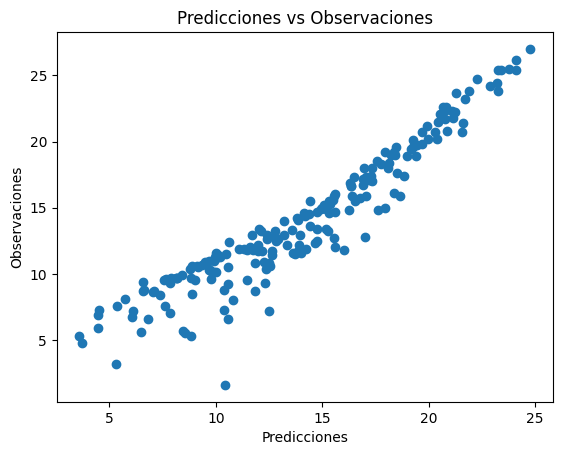

In [19]:
plt.scatter(Y_pred, Y)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones')
plt.title('Predicciones vs Observaciones')
plt.show()

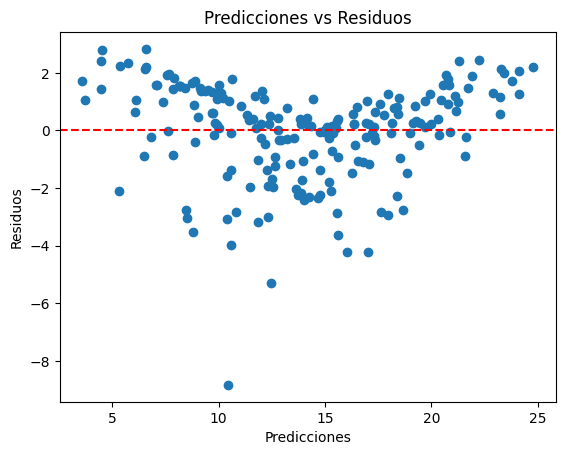

In [20]:
plt.scatter(Y_pred, E)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Predicciones vs Residuos')
plt.show()

Una grafica residual debe verse así

In [21]:
import matplotlib.image as mpimg

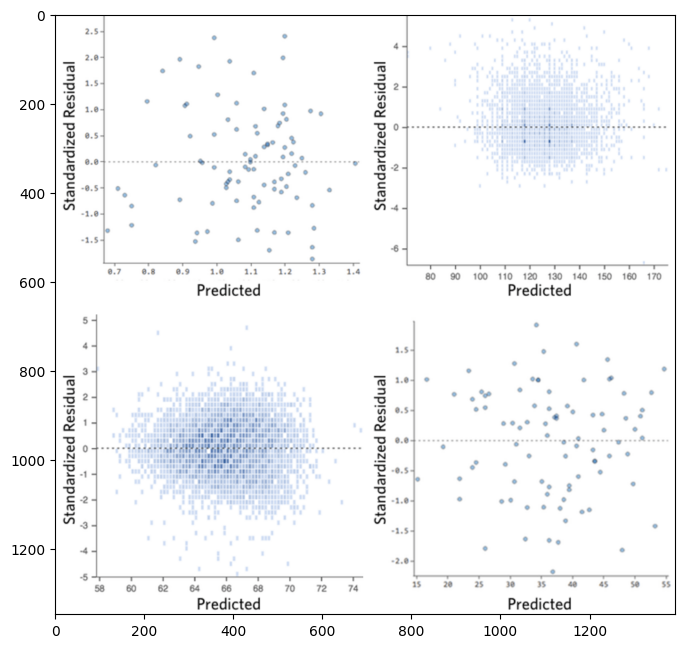

In [24]:
img = mpimg.imread('./good-rp.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()

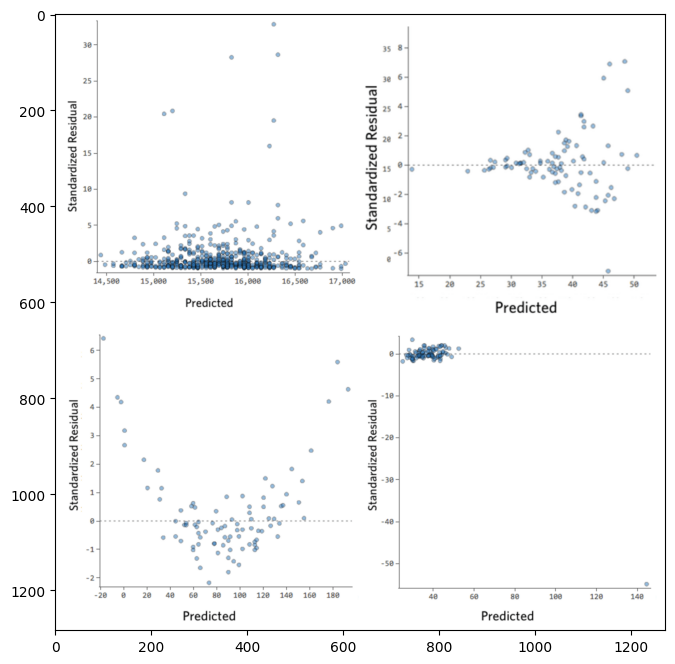

In [25]:
img = mpimg.imread('./bad-rp.png')
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.show()